In [2]:
from keras.optimizers import SGD
from convnetskeras.convnets import preprocess_image_batch, convnet
from keras.preprocessing import image
from models.imagenet_utils import preprocess_input, decode_predictions
from models.inception_v3 import InceptionV3, preprocess_input as preprocess_input_inception
import numpy as np

Using TensorFlow backend.


In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

In [57]:
del model

In [2]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model = convnet('alexnet',weights_path="../alexnet/alexnet_weights.h5", heatmap=False)
model.compile(optimizer=sgd, loss='mse')
size = (227, 227)

In [38]:
model = InceptionV3(weights='imagenet')
size = (299, 299)

94691328/95119472 [============================>.] - ETA: 0s

/home/efernan/OcclusionProject/code/models/inception_v3.py:283: UserWarning: You are using the TensorFlow backend, yet you are using the Theano image dimension ordering convention (`image_dim_ordering="th"`). For best performance, set `image_dim_ordering="tf"` in your Keras config at ~/.keras/keras.json.
  warnings.warn('You are using the TensorFlow backend, yet you '


[[('n02123159', 'tiger_cat', 0.1962747),
  ('n02124075', 'Egyptian_cat', 0.17868355),
  ('n02123045', 'tabby', 0.13230096),
  ('n02441942', 'weasel', 0.074423902),
  ('n02113023', 'Pembroke', 0.016748469)]]

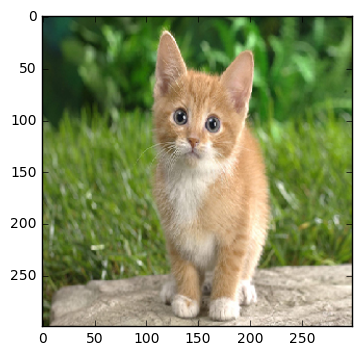

In [52]:
# img_path = 'models/soccer_ball.jpeg'
img_path = 'images/boys.jpg'
img_path = 'images/car_cat.jpg'
img_path = 'images/cat.jpg'
# img_path = 'images/dog.jpg'
img = image.load_img(img_path, target_size=size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
x = preprocess_input_inception(x)
plt.imshow(img)
out = model.predict(x)
decode_predictions(out)

In [7]:
img_path = 'images/cat.jpg'
size = (227, 227)
img = image.load_img(img_path, target_size=size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x.shape

(1, 227, 227, 3)

In [9]:
x = preprocess_input(x)
x.shape

(1, 227, 227, 3)

In [54]:
np.expand_dims(x, axis=0).shape

(1, 3, 299, 299)

In [56]:
im = preprocess_image_batch([img_path],img_size=(256,256), crop_size=(227,227), color_mode="rgb")
im.shape

(1, 3, 227, 227)

In [44]:
out

array([[  4.29778324e-16,   7.57061804e-20,   4.87062103e-16,
          1.29612987e-11,   5.93242231e-18,   2.05595452e-18,
          2.36314954e-19,   9.33149347e-15,   2.39769616e-15,
          2.84690950e-16,   2.93019783e-15,   2.41194964e-17,
          3.55082988e-16,   7.82154035e-15,   3.92854375e-20,
          1.02873525e-19,   7.36271954e-16,   1.17271974e-14,
          6.88864169e-17,   7.96888805e-11,   6.80755483e-17,
          1.30824508e-19,   1.78842590e-18,   5.49679847e-17,
          1.02848413e-19,   1.06021134e-15,   6.36076478e-13,
          2.03956785e-16,   1.11970014e-14,   4.59255792e-23,
          5.35375744e-17,   3.23035140e-11,   1.84715037e-15,
          3.78050625e-14,   7.21698329e-15,   3.20847373e-14,
          1.50327166e-13,   1.28348203e-08,   1.65164741e-17,
          2.02139195e-13,   3.14727004e-13,   1.98727461e-15,
          8.08822777e-21,   1.04094658e-16,   6.72359027e-20,
          1.30473641e-19,   1.76445248e-16,   3.95983896e-20,
        

In [46]:
out

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.34105151e-36,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   9.10459444e-21,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

In [21]:
!ls images

boys.jpg		  cooking-890885_640.jpg  morning-820326_640.jpg
car_cat2.jpg		  dog.jpg		  old-1737724_640.jpg
car_cat.jpg		  fish-bike.jpg		  steak-1807532_640.jpg
cars.jpg		  food-712665_640.jpg	  womans-face-1692453_640.jpg
cat.jpg			  heatmap_dog.png
children-1412016_640.jpg  heatmap.png


In [9]:
(inID, label, score) = decode_predictions(out)[0][0]

In [10]:
decode_predictions(out)

[[('n04254680', 'soccer_ball', 0.15796587),
  ('n02892767', 'brassiere', 0.11013979),
  ('n02916936', 'bulletproof_vest', 0.054606251),
  ('n03255030', 'dumbbell', 0.039518971),
  ('n03623198', 'knee_pad', 0.038667973)]]